In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### CHAMPIONS 2014-2015

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image, display


# Cargar los datos
data = pd.read_csv('Datos_Limpios/UCL2014-2015.csv')

# Codificar los nombres de los equipos
label_encoder = LabelEncoder()
data['Home Team'] = label_encoder.fit_transform(data['Home Team'])
data['Away Team'] = label_encoder.transform(data['Away Team'])

# Crear una columna para representar el resultado del partido
data['Result'] = data['Home Goals'] - data['Away Goals']
data['Result'] = data['Result'].apply(
    lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Dividir los datos en características (X) y variable objetivo (y)
X = data[['Home Team', 'Away Team']]
y = data['Result']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compilar el modelo
model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])


# Entrenar el modelo y guardar el historial del entrenamiento en una variable
history = model.fit(X_train, y_train, epochs=0,
                    batch_size=32, validation_data=(X_test, y_test))

# Dividir los datos en características (X) y variable objetivo (y)
X = data[['Home Team', 'Away Team']]
y = data['Result']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compilar el modelo
model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])


# Entrenar el modelo y guardar el historial del entrenamiento en una variable
history = model.fit(X_train, y_train, epochs=90,
                    batch_size=32, validation_data=(X_test, y_test))

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/90


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.2662 - loss: 0.6685 - val_accuracy: 0.2222 - val_loss: 0.6786
Epoch 2/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3049 - loss: 0.6671 - val_accuracy: 0.3333 - val_loss: 0.6553
Epoch 3/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2913 - loss: 0.6355 - val_accuracy: 0.3704 - val_loss: 0.6402
Epoch 4/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2941 - loss: 0.6199 - val_accuracy: 0.3333 - val_loss: 0.6181
Epoch 5/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2628 - loss: 0.5733 - val_accuracy: 0.3704 - val_loss: 0.5985
Epoch 6/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3145 - loss: 0.5685 - val_accuracy: 0.3704 - val_loss: 0.5899
Epoch 7/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3047 - loss: 0.5934 - val_accuracy: 0.3333 - val_loss: 0.5839
Epoch 8/90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3055 - loss: 0.5915 - val_accuracy: 0.2963 - val_loss: 0.6180
Epoch 9/90


In [3]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Pérdida en datos de prueba:", loss)
print("Precisión en datos de prueba:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3333 - loss: 0.3102
Pérdida en datos de prueba: 0.3102132976055145
Precisión en datos de prueba: 0.3333333432674408


In [4]:
def predict_match_result(home_team, away_team):
    home_team_encoded = label_encoder.transform([home_team])
    away_team_encoded = label_encoder.transform([away_team])
    match_data = pd.DataFrame(
        {'Home Team': home_team_encoded, 'Away Team': away_team_encoded})
    match_data = match_data.values.reshape(1, -1)
    result_probability = model.predict(match_data)
    return result_probability[0][0]

In [5]:
# Definir una función para determinar al ganador de un partido
def determinar_ganador(home_team, away_team, home_goals, away_goals):
    if home_goals > away_goals:
        return home_team
    elif away_goals > home_goals:
        return away_team
    else:
        return "Empate"


# Iterar sobre cada partido y predecir el resultado
df = pd.read_csv('Datos_Limpios/UCL2014-2015.csv')

for index, row in df.iterrows():
    home_team = row['Home Team']
    away_team = row['Away Team']
    home_goals = row['Home Goals']
    away_goals = row['Away Goals']

    # Calcular la probabilidad de que gane el equipo local
    prob_local = predict_match_result(home_team, away_team)

    # Calcular la probabilidad de que gane el equipo visitante
    prob_visitante = 1 - prob_local

    # Determinar al ganador del partido
    ganador = determinar_ganador(home_team, away_team, home_goals, away_goals)

    print(f"Partido: {home_team} vs {away_team}")
    print(f"Probabilidad de que gane {home_team}: {prob_local:.2%}")
    print(f"Probabilidad de que gane {away_team}: {prob_visitante:.2%}")
    print(f"Ganador: {ganador}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Partido: Real Madrid vs FC Basel
Probabilidad de que gane Real Madrid: 15.16%
Probabilidad de que gane FC Basel: 84.84%
Ganador: Real Madrid

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Partido: Liverpool vs Ludogorets Razgrad
Probabilidad de que gane Liverpool: 28.47%
Probabilidad de que gane Ludogorets Razgrad: 71.53%
Ganador: Liverpool

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Partido: Benfica vs FC Zenit
Probabilidad de que gane Benfica: 42.01%
Probabilidad de que gane FC Zenit: 57.99%
Ganador: FC Zenit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Partido: AS Monaco vs Bayer Leverkusen
Probabilidad de que gane AS Monaco: 4.14%
Probabilidad de que gane Bayer Leverkusen: 95.86%
Ganador: AS Monaco

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Partido: Galatasaray vs Anderlecht
Probabilidad de que gane Galatasaray: 78.24%
Probabilidad de que gane Anderlecht: 21.76%
Ganador: Empate

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Partido: Olympiacos vs Atletico de Madrid
Probabil

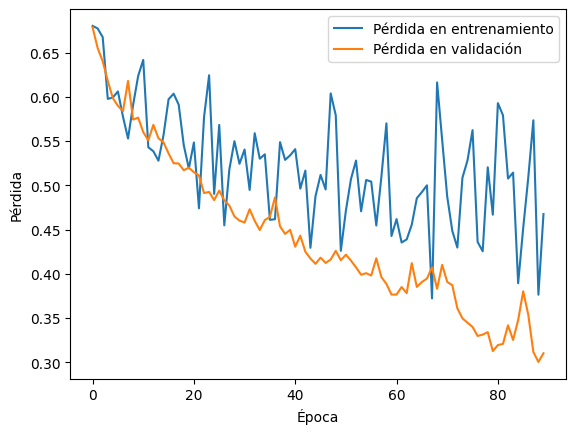

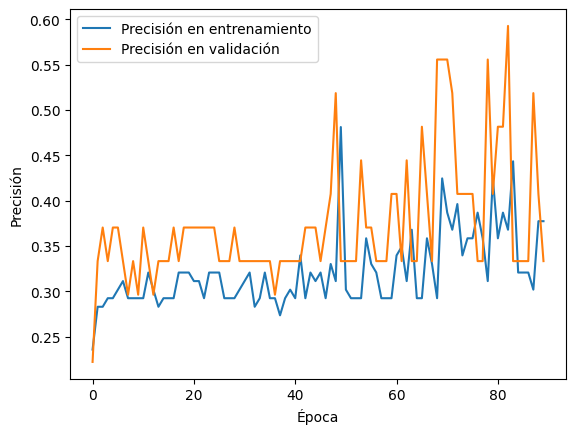

In [6]:

plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

### CHAMPIONS 2015-2016

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


class ChampionsLeaguePredictor:
    def __init__(self):
        self.model = None
        self.label_encoder = LabelEncoder()

    def load_data(self, file_path):
        data = pd.read_csv(file_path)

        # Codificar los nombres de los equipos
        data['Home Team'] = self.label_encoder.fit_transform(data['Home Team'])
        data['Away Team'] = self.label_encoder.transform(data['Away Team'])

        # Crear una columna para representar el resultado del partido
        data['Result'] = data['Home Goals'] - data['Away Goals']
        data['Result'] = data['Result'].apply(
            lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

        # Dividir los datos en características (X) y variable objetivo (y)
        X = data[['Home Team', 'Away Team']]
        y = data['Result']

        # Dividir los datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)

        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train, X_test, y_test, epochs=100):
        # Definir el modelo de red neuronal
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh', input_shape=(2,)),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        # Compilar el modelo
        self.model.compile(optimizer='sgd', loss='binary_crossentropy',
                           metrics=['accuracy'])

        # Entrenar el modelo y guardar el historial del entrenamiento en una variable
        history = self.model.fit(X_train, y_train, epochs=epochs,
                                 batch_size=32, validation_data=(X_test, y_test))

        return history

    def predict_match_result(self, home_team, away_team):
        home_team_encoded = self.label_encoder.transform([home_team])
        away_team_encoded = self.label_encoder.transform([away_team])
        match_data = pd.DataFrame(
            {'Home Team': away_team_encoded, 'Away Team': home_team_encoded})
        match_data = match_data.values.reshape(1, -1)
        result_probability = self.model.predict(match_data)
        return result_probability[0][0]

    def determine_winner(self, home_team, away_team, home_goals, away_goals):
        if home_goals > away_goals:
            return home_team
        elif away_goals > home_goals:
            return away_team
        else:
            return "Empate"


df = pd.read_csv('Datos_Limpios/Champions_Completa.csv')


predictor = ChampionsLeaguePredictor()

X_train, X_test, y_train, y_test = predictor.load_data(
    'Datos_Limpios/Champions_Completa.csv')
history = predictor.train_model(X_train, y_train, X_test, y_test, epochs=100)

Epoch 1/100


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2629 - loss: 0.5988 - val_accuracy: 0.1864 - val_loss: 0.3857
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2219 - loss: 0.4200 - val_accuracy: 0.1864 - val_loss: 0.4220
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1935 - loss: 0.4971 - val_accuracy: 0.1864 - val_loss: 0.3660
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1861 - loss: 0.3083 - val_accuracy: 0.1864 - val_loss: 0.4449
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2180 - loss: 0.4349 - val_accuracy: 0.1864 - val_loss: 0.3959
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2281 - loss: 0.4389 - val_accuracy: 0.1864 - val_loss: 0.3894
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2066 - loss: 0.4933 - val_accuracy: 0.1864 - val_loss: 0.3828
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1947 - loss: 0.5241 - val_accuracy: 0.1864 - val_loss: 0.3

In [8]:
# PREDICE EL RESULTADO DE UN PARTIDO

equipo1 = "Real Madrid"
equipo2 = "FC Barcelona"
prob_visitante1 = predictor.predict_match_result(equipo1, equipo2)
prob_local1 = 1 - prob_visitante
print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local1:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante1:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Probabilidad de que gane equipo local Real Madrid: 34.61%
Probabilidad de que gane equipo visitante FC Barcelona: 16.97%


In [9]:

equipo1 = "FC Barcelona"
equipo2 = "Real Madrid"
prob_local2 = predictor.predict_match_result(equipo1, equipo2)
prob_visitante2 = 1 - prob_local
print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local2:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante2:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Probabilidad de que gane equipo local FC Barcelona: 14.26%
Probabilidad de que gane equipo visitante Real Madrid: 65.39%


In [10]:
print("Probabilidad en una final entre Real Madrid y FC Barcelona")
PROBABILIDAD_A = (prob_local1 + prob_visitante2) / 2
PROBABILIDAD_B = (prob_local2 + prob_visitante1) / 2
PROBABILIDAD_EMPATE = 1 - (PROBABILIDAD_A + PROBABILIDAD_B)

PROBABILIDAD_A = PROBABILIDAD_A + (PROBABILIDAD_EMPATE / 2)
PROBABILIDAD_B = PROBABILIDAD_B + (PROBABILIDAD_EMPATE / 2)

print(f"Probabilidad de que gane Real Madrid: {PROBABILIDAD_A:.2%}")
print(f"Probabilidad de que gane FC Barcelona: {PROBABILIDAD_B:.2%}")
probbempate = 1 - (PROBABILIDAD_A + PROBABILIDAD_B)

Probabilidad en una final entre Real Madrid y FC Barcelona
Probabilidad de que gane Real Madrid: 67.19%
Probabilidad de que gane FC Barcelona: 32.81%


### SIMULADOR DE LA FASE FINAL DE LA CHAMPIONS

Comenzamos con los emparejamientos de Cuartos de final entre:

-PSG vs FC Barcelona

-Atlético de Madrid vs Dortmunt

-Arsenal vs Bayern

-Madrid vs Manchester city

In [15]:
# Haz la ida y vuelta de PSG vs FC Barcelona ida y vuelta, suma los resultados y divide entre 2

equipo1 = "Paris Saint-Germain"
equipo2 = "FC Barcelona"

prob_visitante1 = predictor.predict_match_result(equipo1, equipo2)
prob_local1 = 1 - prob_visitante
print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local1:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante1:.2%}")

equipo1 = "FC Barcelona"
equipo2 = "Paris Saint-Germain"
prob_local2 = predictor.predict_match_result(equipo1, equipo2)
prob_visitante2 = 1 - prob_local
print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local2:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante2:.2%}")

print("Probabilidad final entre PSG y FC Barcelona")
PROBABILIDAD_A = (prob_local1 + prob_visitante2) / 2
PROBABILIDAD_B = (prob_local2 + prob_visitante1) / 2
PROBABILIDAD_EMPATE = 1 - (PROBABILIDAD_A + PROBABILIDAD_B)

PROBABILIDAD_A = PROBABILIDAD_A + (PROBABILIDAD_EMPATE / 2)
PROBABILIDAD_B = PROBABILIDAD_B + (PROBABILIDAD_EMPATE / 2)

print(f"Probabilidad de que gane PSG: {PROBABILIDAD_A:.2%}")
print(f"Probabilidad de que gane FC Barcelona: {PROBABILIDAD_B:.2%}")

print("EL ganador de FC Barcelona vs PSG es: ")

if PROBABILIDAD_A > PROBABILIDAD_B:
    print("PSG")
    img = Image.open('Escudos/Paris Saint-Germain.png')
    img.show()

elif PROBABILIDAD_B > PROBABILIDAD_A:
    print("FC Barcelona")
    img = Image.open('Escudos/FC Barcelona.png')
    img.show()
   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Probabilidad de que gane equipo local Paris Saint-Germain: 34.61%
Probabilidad de que gane equipo visitante FC Barcelona: 24.48%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Probabilidad de que gane equipo local FC Barcelona: 13.93%
Probabilidad de que gane equipo visitante Paris Saint-Germain: 65.39%
Probabilidad final entre PSG y FC Barcelona
Probabilidad de que gane PSG: 65.40%
Probabilidad de que gane FC Barcelona: 34.60%
EL ganador de FC Barcelona vs PSG es: 
PSG


In [18]:
# Haz lo mismo con el partido de ida y vuelta de Atlético de Madrid vs Borussia Dortmund

equipo1 = "Atletico de Madrid"
equipo2 = "Borussia Dortmund"

prob_visitante1 = predictor.predict_match_result(equipo1, equipo2)
prob_local1 = 1 - prob_visitante

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local1:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante1:.2%}")

equipo1 = "Borussia Dortmund"
equipo2 = "Atletico de Madrid"

prob_local2 = predictor.predict_match_result(equipo1, equipo2)
prob_visitante2 = 1 - prob_local

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local2:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante2:.2%}")

print("Probabilidad final entre Atlético de Madrid y Borussia Dortmund")
PROBABILIDAD_A = (prob_local1 + prob_visitante2) / 2
PROBABILIDAD_B = (prob_local2 + prob_visitante1) / 2

PROBABILIDAD_EMPATE = 1 - (PROBABILIDAD_A + PROBABILIDAD_B)

PROBABILIDAD_A = PROBABILIDAD_A + (PROBABILIDAD_EMPATE / 2)
PROBABILIDAD_B = PROBABILIDAD_B + (PROBABILIDAD_EMPATE / 2)

print(f"Probabilidad de que gane Atlético de Madrid: {PROBABILIDAD_A:.2%}")
print(f"Probabilidad de que gane Borussia Dortmund: {PROBABILIDAD_B:.2%}")

print("EL ganador de Atlético de Madrid vs Borussia Dortmund es: ")

if PROBABILIDAD_A > PROBABILIDAD_B:
    print("Atlético de Madrid")
    img = Image.open('Escudos/atletico.png')
    img.show()

elif PROBABILIDAD_B > PROBABILIDAD_A:
    print("Borussia Dortmund")
    img = Image.open('Escudos/dortmund.png')
    img.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Probabilidad de que gane equipo local Atletico de Madrid: 34.61%
Probabilidad de que gane equipo visitante Borussia Dortmund: 17.02%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Probabilidad de que gane equipo local Borussia Dortmund: 19.45%
Probabilidad de que gane equipo visitante Atletico de Madrid: 65.39%
Probabilidad final entre Atlético de Madrid y Borussia Dortmund
Probabilidad de que gane Atlético de Madrid: 65.88%
Probabilidad de que gane Borussia Dortmund: 34.12%
EL ganador de Atlético de Madrid vs Borussia Dortmund es: 
Atlético de Madrid


In [19]:
# Ahora haz lo mismo con el partido de ida y vuelta del Arsenal vs Bayern Munich

equipo1 = "Arsenal"
equipo2 = "Bayern Munich"

prob_visitante1 = predictor.predict_match_result(equipo1, equipo2)
prob_local1 = 1 - prob_visitante

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local1:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante1:.2%}")

equipo1 = "Bayern Munich"
equipo2 = "Arsenal"

prob_local2 = predictor.predict_match_result(equipo1, equipo2)
prob_visitante2 = 1 - prob_local

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local2:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante2:.2%}")

print("Probabilidad final entre Arsenal y Bayern Munich")

PROBABILIDAD_A = (prob_local1 + prob_visitante2) / 2
PROBABILIDAD_B = (prob_local2 + prob_visitante1) / 2

PROBABILIDAD_EMPATE = 1 - (PROBABILIDAD_A + PROBABILIDAD_B)

PROBABILIDAD_A = PROBABILIDAD_A + (PROBABILIDAD_EMPATE / 2)
PROBABILIDAD_B = PROBABILIDAD_B + (PROBABILIDAD_EMPATE / 2)

print(f"Probabilidad de que gane Arsenal: {PROBABILIDAD_A:.2%}")
print(f"Probabilidad de que gane Bayern Munich: {PROBABILIDAD_B:.2%}")

print("EL ganador de Arsenal vs Bayern Munich es: ")

if PROBABILIDAD_A > PROBABILIDAD_B:
    print("Arsenal")
    img = Image.open('Escudos/arsenal.png')
    img.show()

elif PROBABILIDAD_B > PROBABILIDAD_A:
    print("Bayern Munich")
    img = Image.open('Escudos/bayern.png')
    img.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Probabilidad de que gane equipo local Arsenal: 34.61%
Probabilidad de que gane equipo visitante Bayern Munich: 19.41%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Probabilidad de que gane equipo local Bayern Munich: 15.86%
Probabilidad de que gane equipo visitante Arsenal: 65.39%
Probabilidad final entre Arsenal y Bayern Munich
Probabilidad de que gane Arsenal: 66.18%
Probabilidad de que gane Bayern Munich: 33.82%
EL ganador de Arsenal vs Bayern Munich es: 
Arsenal


In [20]:
# lo mismo con real madrid y manchester city

equipo1 = "Real Madrid"
equipo2 = "Manchester City"

prob_visitante1 = predictor.predict_match_result(equipo1, equipo2)
prob_local1 = 1 - prob_visitante

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local1:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante1:.2%}")

equipo1 = "Manchester City"
equipo2 = "Real Madrid"

prob_local2 = predictor.predict_match_result(equipo1, equipo2)
prob_visitante2 = 1 - prob_local

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local2:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante2:.2%}")

print("Probabilidad final entre Real Madrid y Manchester City")

PROBABILIDAD_A = (prob_local1 + prob_visitante2) / 2
PROBABILIDAD_B = (prob_local2 + prob_visitante1) / 2

PROBABILIDAD_EMPATE = 1 - (PROBABILIDAD_A + PROBABILIDAD_B)

PROBABILIDAD_A = PROBABILIDAD_A + (PROBABILIDAD_EMPATE / 2)
PROBABILIDAD_B = PROBABILIDAD_B + (PROBABILIDAD_EMPATE / 2)

print(f"Probabilidad de que gane Real Madrid: {PROBABILIDAD_A:.2%}")
print(f"Probabilidad de que gane Manchester City: {PROBABILIDAD_B:.2%}")

print("EL ganador de Real Madrid vs Manchester City es: ")

if PROBABILIDAD_A > PROBABILIDAD_B:
    print("Real Madrid")
    img = Image.open('Escudos/Real Madrid.png')
    img.show()

elif PROBABILIDAD_B > PROBABILIDAD_A:
    print("Manchester City")
    img = Image.open('Escudos/Manchester City.png')
    img.show()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Probabilidad de que gane equipo local Real Madrid: 34.61%
Probabilidad de que gane equipo visitante Manchester City: 14.15%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Probabilidad de que gane equipo local Manchester City: 15.73%
Probabilidad de que gane equipo visitante Real Madrid: 65.39%
Probabilidad final entre Real Madrid y Manchester City
Probabilidad de que gane Real Madrid: 67.53%
Probabilidad de que gane Manchester City: 32.47%
EL ganador de Real Madrid vs Manchester City es: 
Real Madrid


In [21]:
# lo mismo con FC Barcelona y Atletico de Madrid

equipo1 = "FC Barcelona"
equipo2 = "Atletico de Madrid"

prob_visitante1 = predictor.predict_match_result(equipo1, equipo2)
prob_local1 = 1 - prob_visitante

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local1:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante1:.2%}")

equipo1 = "Atletico de Madrid"
equipo2 = "FC Barcelona"

prob_local2 = predictor.predict_match_result(equipo1, equipo2)
prob_visitante2 = 1 - prob_local

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local2:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante2:.2%}")

print("Probabilidad final entre FC Barcelona y Atletico de Madrid")

PROBABILIDAD_A = (prob_local1 + prob_visitante2) / 2

PROBABILIDAD_B = (prob_local2 + prob_visitante1) / 2

PROBABILIDAD_EMPATE = 1 - (PROBABILIDAD_A + PROBABILIDAD_B)

PROBABILIDAD_A = PROBABILIDAD_A + (PROBABILIDAD_EMPATE / 2)

PROBABILIDAD_B = PROBABILIDAD_B + (PROBABILIDAD_EMPATE / 2)

print(f"Probabilidad de que gane FC Barcelona: {PROBABILIDAD_A:.2%}")
print(f"Probabilidad de que gane Atletico de Madrid: {PROBABILIDAD_B:.2%}")


print("EL ganador de FC Barcelona vs Atletico de Madrid es: ")

if PROBABILIDAD_A > PROBABILIDAD_B:
    print("FC Barcelona")
    img = Image.open('Escudos/FC Barcelona.png')
    img.show()

elif PROBABILIDAD_B > PROBABILIDAD_A:
    print("Atletico de Madrid")
    img = Image.open('Escudos/atletico.png')
    img.show()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Probabilidad de que gane equipo local FC Barcelona: 34.61%
Probabilidad de que gane equipo visitante Atletico de Madrid: 12.86%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Probabilidad de que gane equipo local Atletico de Madrid: 14.50%
Probabilidad de que gane equipo visitante FC Barcelona: 65.39%
Probabilidad final entre FC Barcelona y Atletico de Madrid
Probabilidad de que gane FC Barcelona: 68.16%
Probabilidad de que gane Atletico de Madrid: 31.84%
EL ganador de FC Barcelona vs Atletico de Madrid es: 
FC Barcelona


In [22]:
# haz lo mismo con el Real MAdrid vs Arsenal

equipo1 = "Real Madrid"
equipo2 = "Arsenal"

prob_visitante1 = predictor.predict_match_result(equipo1, equipo2)
prob_local1 = 1 - prob_visitante

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local1:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante1:.2%}")

equipo1 = "Arsenal"
equipo2 = "Real Madrid"

prob_local2 = predictor.predict_match_result(equipo1, equipo2)
prob_visitante2 = 1 - prob_local

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local2:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante2:.2%}")

print("Probabilidad final entre Real Madrid y Arsenal")


PROBABILIDAD_A = (prob_local1 + prob_visitante2) / 2

PROBABILIDAD_B = (prob_local2 + prob_visitante1) / 2

PROBABILIDAD_EMPATE = 1 - (PROBABILIDAD_A + PROBABILIDAD_B)

PROBABILIDAD_A = PROBABILIDAD_A + (PROBABILIDAD_EMPATE / 2)

PROBABILIDAD_B = PROBABILIDAD_B + (PROBABILIDAD_EMPATE / 2)

print(f"Probabilidad de que gane Real Madrid: {PROBABILIDAD_A:.2%}")

print(f"Probabilidad de que gane Arsenal: {PROBABILIDAD_B:.2%}")

print("EL ganador de Real Madrid vs Arsenal es: ")

if PROBABILIDAD_A > PROBABILIDAD_B:
    print("Real Madrid")
    img = Image.open('Escudos/Real Madrid.png')
    img.show()

elif PROBABILIDAD_B > PROBABILIDAD_A:
    print("Arsenal")
    img = Image.open('Escudos/arsenal.png')
    img.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Probabilidad de que gane equipo local Real Madrid: 34.61%
Probabilidad de que gane equipo visitante Arsenal: 0.50%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Probabilidad de que gane equipo local Arsenal: 16.13%
Probabilidad de que gane equipo visitante Real Madrid: 65.39%
Probabilidad final entre Real Madrid y Arsenal
Probabilidad de que gane Real Madrid: 70.84%
Probabilidad de que gane Arsenal: 29.16%
EL ganador de Real Madrid vs Arsenal es: 
Real Madrid


In [23]:
#final entre Real Madrid y FC Barcelona

equipo1 = "Real Madrid"
equipo2 = "FC Barcelona"

prob_visitante1 = predictor.predict_match_result(equipo1, equipo2)
prob_local1 = 1 - prob_visitante

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local1:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante1:.2%}")

equipo1 = "FC Barcelona"
equipo2 = "Real Madrid"

prob_local2 = predictor.predict_match_result(equipo1, equipo2)
prob_visitante2 = 1 - prob_local

print(f"Probabilidad de que gane equipo local {equipo1}: {prob_local2:.2%}")
print(f"Probabilidad de que gane equipo visitante {equipo2}: {prob_visitante2:.2%}")

print("Probabilidad en una final entre Real Madrid y FC Barcelona")
PROBABILIDAD_A = (prob_local1 + prob_visitante2) / 2
PROBABILIDAD_B = (prob_local2 + prob_visitante1) / 2

PROBABILIDAD_EMPATE = 1 - (PROBABILIDAD_A + PROBABILIDAD_B)

PROBABILIDAD_A = PROBABILIDAD_A + (PROBABILIDAD_EMPATE / 2)

PROBABILIDAD_B = PROBABILIDAD_B + (PROBABILIDAD_EMPATE / 2)


print(f"Probabilidad de que gane Real Madrid: {PROBABILIDAD_A:.2%}")
print(f"Probabilidad de que gane FC Barcelona: {PROBABILIDAD_B:.2%}")

print("EL ganador de FC Barcelona vs Real Madrid es: ")

if PROBABILIDAD_A > PROBABILIDAD_B:
    print("Real Madrid")
    img = Image.open('Escudos/Real Madrid.png')
    img.show()

elif PROBABILIDAD_B > PROBABILIDAD_A:
    print("FC Barcelona")
    img = Image.open('Escudos/FC Barcelona.png')
    img.show()

    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Probabilidad de que gane equipo local Real Madrid: 34.61%
Probabilidad de que gane equipo visitante FC Barcelona: 16.97%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Probabilidad de que gane equipo local FC Barcelona: 14.26%
Probabilidad de que gane equipo visitante Real Madrid: 65.39%
Probabilidad en una final entre Real Madrid y FC Barcelona
Probabilidad de que gane Real Madrid: 67.19%
Probabilidad de que gane FC Barcelona: 32.81%
EL ganador de FC Barcelona vs Real Madrid es: 
Real Madrid
